In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Device ayarları
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper Parametreleri ayarları
input_size= 784  # resimler 28x28 
hidden_size = 100
num_classes = 10 # 1-10 arası rakamları var
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [3]:
#MNIST dataset
train_dataset = torchvision.datasets.MNIST(root = './data', train = True,
                                           transform = transforms.ToTensor(),
                                          download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False,
                                           transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

In [4]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)
# batch size = 100 , resimler tek kanallı, height ve width degerleri

torch.Size([100, 1, 28, 28]) torch.Size([100])


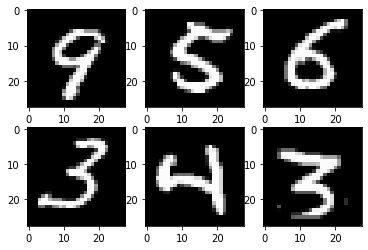

In [5]:
for i in range (6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()    

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
        # Bu kısmı cuda hatasından dolayı ekledim bu kısımların da GPU ya taşınması gerekiyordu.
        self.l1 = self.l1.to(device)
        self.l2 = self.l2.to(device)
        self.relu = self.relu.to(device)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        
        return out
    

In [7]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [8]:
# loss ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


In [9]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        # shape resize yapmalıyız. 100,1,28,28 di bizim input size 784
        # yapmamaız gereken 100,784
        images = images.reshape(-1,28*28).to(device) 
        # -1 verince bizim için otomatik yaptığını söyledi. to device ile gpu var ise oraya paslıyor.
        
        # Aynı şekilde etiketleri de varsa gpu ya paslıyor.
        labels = labels.to(device)
        
        #forward pass kısmı
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backward pass kısmı
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1) % 1 == 0:
            print(f'epoch{epoch+1} / {num_epochs}, step{i+1}/{n_total_steps},loss = {loss.item():.4f}')
            
        

epoch1 / 2, step1/600,loss = 2.3037
epoch1 / 2, step2/600,loss = 2.2535
epoch1 / 2, step3/600,loss = 2.2213
epoch1 / 2, step4/600,loss = 2.1927
epoch1 / 2, step5/600,loss = 2.1706
epoch1 / 2, step6/600,loss = 2.0402
epoch1 / 2, step7/600,loss = 2.0441
epoch1 / 2, step8/600,loss = 1.9990
epoch1 / 2, step9/600,loss = 1.9637
epoch1 / 2, step10/600,loss = 1.8384
epoch1 / 2, step11/600,loss = 1.9004
epoch1 / 2, step12/600,loss = 1.8093
epoch1 / 2, step13/600,loss = 1.7469
epoch1 / 2, step14/600,loss = 1.7506
epoch1 / 2, step15/600,loss = 1.6626
epoch1 / 2, step16/600,loss = 1.6254
epoch1 / 2, step17/600,loss = 1.6274
epoch1 / 2, step18/600,loss = 1.5195
epoch1 / 2, step19/600,loss = 1.5693
epoch1 / 2, step20/600,loss = 1.4402
epoch1 / 2, step21/600,loss = 1.3517
epoch1 / 2, step22/600,loss = 1.2548
epoch1 / 2, step23/600,loss = 1.2633
epoch1 / 2, step24/600,loss = 1.2722
epoch1 / 2, step25/600,loss = 1.2429
epoch1 / 2, step26/600,loss = 1.2044
epoch1 / 2, step27/600,loss = 1.1278
epoch1 / 2

epoch1 / 2, step442/600,loss = 0.3662
epoch1 / 2, step443/600,loss = 0.2756
epoch1 / 2, step444/600,loss = 0.2828
epoch1 / 2, step445/600,loss = 0.3642
epoch1 / 2, step446/600,loss = 0.1594
epoch1 / 2, step447/600,loss = 0.3195
epoch1 / 2, step448/600,loss = 0.2540
epoch1 / 2, step449/600,loss = 0.2676
epoch1 / 2, step450/600,loss = 0.4314
epoch1 / 2, step451/600,loss = 0.1705
epoch1 / 2, step452/600,loss = 0.5644
epoch1 / 2, step453/600,loss = 0.2694
epoch1 / 2, step454/600,loss = 0.3180
epoch1 / 2, step455/600,loss = 0.3679
epoch1 / 2, step456/600,loss = 0.1453
epoch1 / 2, step457/600,loss = 0.2963
epoch1 / 2, step458/600,loss = 0.2004
epoch1 / 2, step459/600,loss = 0.4418
epoch1 / 2, step460/600,loss = 0.1986
epoch1 / 2, step461/600,loss = 0.1809
epoch1 / 2, step462/600,loss = 0.2551
epoch1 / 2, step463/600,loss = 0.2465
epoch1 / 2, step464/600,loss = 0.1390
epoch1 / 2, step465/600,loss = 0.2761
epoch1 / 2, step466/600,loss = 0.2569
epoch1 / 2, step467/600,loss = 0.2293
epoch1 / 2, 

epoch2 / 2, step63/600,loss = 0.2325
epoch2 / 2, step64/600,loss = 0.1401
epoch2 / 2, step65/600,loss = 0.2751
epoch2 / 2, step66/600,loss = 0.2854
epoch2 / 2, step67/600,loss = 0.2096
epoch2 / 2, step68/600,loss = 0.1429
epoch2 / 2, step69/600,loss = 0.1454
epoch2 / 2, step70/600,loss = 0.2205
epoch2 / 2, step71/600,loss = 0.1547
epoch2 / 2, step72/600,loss = 0.3111
epoch2 / 2, step73/600,loss = 0.2701
epoch2 / 2, step74/600,loss = 0.2935
epoch2 / 2, step75/600,loss = 0.3194
epoch2 / 2, step76/600,loss = 0.2366
epoch2 / 2, step77/600,loss = 0.2622
epoch2 / 2, step78/600,loss = 0.2179
epoch2 / 2, step79/600,loss = 0.1282
epoch2 / 2, step80/600,loss = 0.2764
epoch2 / 2, step81/600,loss = 0.1446
epoch2 / 2, step82/600,loss = 0.1714
epoch2 / 2, step83/600,loss = 0.1459
epoch2 / 2, step84/600,loss = 0.1265
epoch2 / 2, step85/600,loss = 0.2846
epoch2 / 2, step86/600,loss = 0.1545
epoch2 / 2, step87/600,loss = 0.1317
epoch2 / 2, step88/600,loss = 0.1640
epoch2 / 2, step89/600,loss = 0.2236
e

epoch2 / 2, step284/600,loss = 0.3915
epoch2 / 2, step285/600,loss = 0.2994
epoch2 / 2, step286/600,loss = 0.2380
epoch2 / 2, step287/600,loss = 0.1798
epoch2 / 2, step288/600,loss = 0.1665
epoch2 / 2, step289/600,loss = 0.1589
epoch2 / 2, step290/600,loss = 0.1103
epoch2 / 2, step291/600,loss = 0.2693
epoch2 / 2, step292/600,loss = 0.1587
epoch2 / 2, step293/600,loss = 0.0786
epoch2 / 2, step294/600,loss = 0.2508
epoch2 / 2, step295/600,loss = 0.2266
epoch2 / 2, step296/600,loss = 0.2303
epoch2 / 2, step297/600,loss = 0.2044
epoch2 / 2, step298/600,loss = 0.2387
epoch2 / 2, step299/600,loss = 0.2790
epoch2 / 2, step300/600,loss = 0.1315
epoch2 / 2, step301/600,loss = 0.1657
epoch2 / 2, step302/600,loss = 0.2181
epoch2 / 2, step303/600,loss = 0.2068
epoch2 / 2, step304/600,loss = 0.2447
epoch2 / 2, step305/600,loss = 0.1170
epoch2 / 2, step306/600,loss = 0.3102
epoch2 / 2, step307/600,loss = 0.2858
epoch2 / 2, step308/600,loss = 0.3699
epoch2 / 2, step309/600,loss = 0.2865
epoch2 / 2, 

epoch2 / 2, step508/600,loss = 0.1049
epoch2 / 2, step509/600,loss = 0.2445
epoch2 / 2, step510/600,loss = 0.2803
epoch2 / 2, step511/600,loss = 0.1631
epoch2 / 2, step512/600,loss = 0.1368
epoch2 / 2, step513/600,loss = 0.0902
epoch2 / 2, step514/600,loss = 0.0668
epoch2 / 2, step515/600,loss = 0.1474
epoch2 / 2, step516/600,loss = 0.1901
epoch2 / 2, step517/600,loss = 0.1003
epoch2 / 2, step518/600,loss = 0.1422
epoch2 / 2, step519/600,loss = 0.0756
epoch2 / 2, step520/600,loss = 0.2210
epoch2 / 2, step521/600,loss = 0.1603
epoch2 / 2, step522/600,loss = 0.1671
epoch2 / 2, step523/600,loss = 0.2441
epoch2 / 2, step524/600,loss = 0.2423
epoch2 / 2, step525/600,loss = 0.2886
epoch2 / 2, step526/600,loss = 0.2117
epoch2 / 2, step527/600,loss = 0.1068
epoch2 / 2, step528/600,loss = 0.1264
epoch2 / 2, step529/600,loss = 0.1435
epoch2 / 2, step530/600,loss = 0.1685
epoch2 / 2, step531/600,loss = 0.1599
epoch2 / 2, step532/600,loss = 0.1052
epoch2 / 2, step533/600,loss = 0.2181
epoch2 / 2, 

In [10]:
# test kısmı
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # max fonksiyonu value ve index döndürür biz index ile ilgileniyoruz.
        _,predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        # her doğru tahmin için 1 ekler.
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'acc = {acc}')

acc = 95.27
